In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from constantes import *
from main import *
from bt import *
from pl import *
from gd import *
from gd_2 import *
import random
from itertools import combinations
import statsmodels.api as sm

In [35]:
def generar_instancia_aleatoria(num_maestros, num_habilidades, k, random_k = False):
    
    maestros_al = random.randint(2, num_maestros)
    
    maestros = [f'Maestro{i}' for i in range(maestros_al)]
    habilidades = [random.randint(1, num_habilidades) for _ in range(maestros_al)]
    if random_k:
        k = random.randint(2, k)
    return maestros, habilidades, k

In [36]:
def medir_tiempo_ejecucion(algoritmo, maestros, habilidades, k, num_repeticiones=3):
    tiempos = []
    for _ in range(num_repeticiones):
        start_time = time.time()
        algoritmo(maestros, habilidades, k)
        end_time = time.time()
        tiempos.append(end_time - start_time)
    return np.mean(tiempos)

In [37]:
def grafico_comparativo_bt_gd_pl(num_instancias,num_maestros, num_habilidades, k):

    tiempos_bt = []
    tiempos_pl = []  # Placeholder for Programación Lineal tiempos
    tiempos_gd = []  # Placeholder for Greedy tiempos
    tiempos_gd2 = []  # Placeholder for Greedy tiempos

    instancias = [i for i in range(0,num_instancias)]

    for _ in range(0, num_instancias):
        maestros, habilidades, k_al = generar_instancia_aleatoria(num_maestros, num_habilidades, k,True)
        print(f"Instancia: maestros = {maestros}, habilidades = {habilidades}, k = {k_al}") 

        tiempo_bt = medir_tiempo_ejecucion(p_opt_tribu_agua_bt, maestros, habilidades, k_al)  
        tiempos_bt.append(tiempo_bt)

        tiempo_pl = medir_tiempo_ejecucion(p_opt_tribu_agua_pl, maestros, habilidades, k_al)
        tiempos_pl.append(tiempo_pl)

        tiempo_gd = medir_tiempo_ejecucion(p_opt_tribu_agua_gd, maestros, habilidades, k_al) 
        tiempos_gd.append(tiempo_gd)

        tiempo_gd2 = medir_tiempo_ejecucion(p_opt_tribu_agua_gd2, maestros, habilidades, k_al) 
        tiempos_gd2.append(tiempo_gd2)


    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(instancias, tiempos_bt, label='Backtracking',color='blue')
    plt.plot(instancias, tiempos_gd, label='Greedy Maestro Pakku',color='green')  # Placeholder
    plt.plot(instancias, tiempos_gd2, label='Greedy Alternativo',color='purple')  # Placeholder
    plt.xticks([i for i in range(0,num_instancias+1,5)])
    plt.ylabel('Tiempo de ejecución (s)')
    plt.title('Tiempos de ejecución de instancias aleatorias: Greedy, Backtracking y Programación Lineal')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(instancias, tiempos_pl, label='Programación Lineal',color='red')  # Placeholder
    plt.xlabel('Insatancias')
    plt.xticks([i for i in range(0,num_instancias+1,5)])
    plt.ylabel('Tiempo de ejecución (s)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    
    plt.show()




Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2', 'Maestro3', 'Maestro4', 'Maestro5'], habilidades = [158, 714, 882, 236, 757, 346], k = 5
[882, 757, 714, 504, 236]
[882, 757, 714, 504, 236]
[882, 757, 714, 504, 236]
Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2'], habilidades = [51, 260, 796], k = 2
[796, 311]
[796, 311]
[796, 311]
Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2'], habilidades = [789, 903, 203], k = 3
[903, 789, 203]
[903, 789, 203]
[903, 789, 203]
Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2', 'Maestro3', 'Maestro4', 'Maestro5'], habilidades = [268, 195, 728, 222, 127, 525], k = 4
[728, 525, 463, 349]
[728, 525, 463, 349]
[728, 525, 463, 349]
Instancia: maestros = ['Maestro0', 'Maestro1'], habilidades = [629, 644], k = 3
[644, 629, 0]
[644, 629, 0]
[644, 629, 0]
Instancia: maestros = ['Maestro0', 'Maestro1', 'Maestro2', 'Maestro3'], habilidades = [428, 885, 893, 813], k = 5
[893, 885, 813, 428, 0]
[893, 885, 813, 428, 0]
[893,

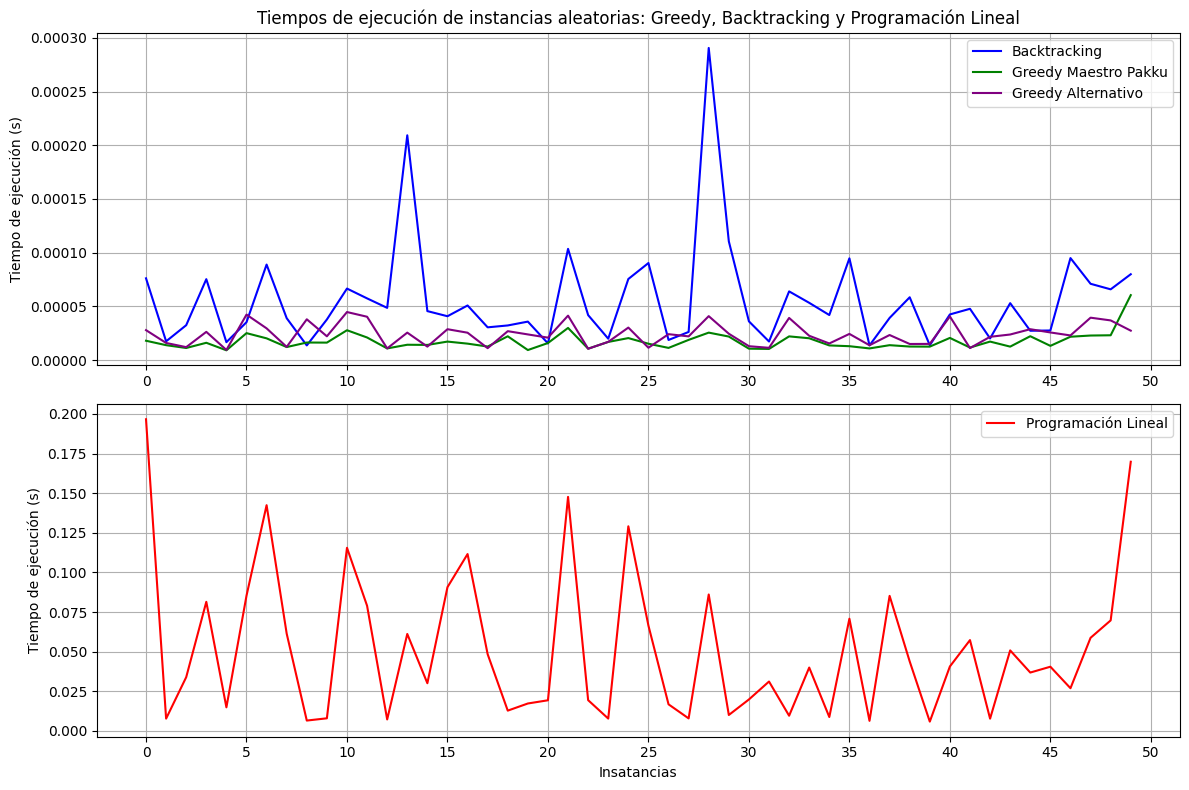

In [38]:
num_instancias = 50
num_maestros = 6
num_habilidades = 1000
k = 5

grafico_comparativo_bt_gd_pl(num_instancias,num_maestros, num_habilidades, k)
#grafico_pl(num_instancias,num_maestros, num_habilidades, k)

In [39]:
def generar_datos_aleatorios(n, max_habilidad=100):
    maestros = list(range(n))
    habilidades = np.random.randint(1, max_habilidad+1, n)
    return maestros, habilidades

In [40]:
resultados_optimos = [
    1894340,
    1640690,
    807418,
    4298131,
    385249,
    355882,
    172295,
    2906564,
    15659106,
    15292055,
    10694510,
    4311889,
    6377225,
    15974095,
    11513230,
    5427764,
    10322822,
    11971097,
    21081875,
    16828799,
    11417428
]

archivos = [
    PRUEBA_1,
    PRUEBA_2,
    PRUEBA_3,
    PRUEBA_4,
    PRUEBA_5,
    PRUEBA_6,
    PRUEBA_7,
    PRUEBA_8,
    PRUEBA_9,
    PRUEBA_10,
    PRUEBA_11,
    PRUEBA_12,
    PRUEBA_13,
    PRUEBA_14,
    PRUEBA_15,
    PRUEBA_16,
    PRUEBA_17,
    PRUEBA_18,
    PRUEBA_19,
    PRUEBA_20,
    PRUEBA_21
]

In [41]:
def graficar_comparacion_greedys(ruta, archivos):
    aproximaciones = []
    aproximaciones_2 = []
    optimos = resultados_optimos
    relaciones = []
    relaciones_2 = []
    instancias = [i for i in range(1, len(archivos) + 1)]

    for archivo in archivos:
        maestros, habilidades, k = leer_archivo(archivo, ruta)
        _, coef_aprox = p_opt_tribu_agua_gd(maestros, habilidades, k)
        aproximaciones.append(coef_aprox)

        _, coef_aprox_2 = p_opt_tribu_agua_gd2(maestros, habilidades, k)
        aproximaciones_2.append(coef_aprox_2)
 
    for coef_aprox, coef_opt in zip(aproximaciones, optimos):
        relaciones.append(coef_aprox / coef_opt)

    for coef_aprox_2, coef_opt in zip(aproximaciones_2, optimos):
        relaciones_2.append(coef_aprox_2 / coef_opt)

    print(relaciones)

    plt.figure(figsize=(21, 8))

    plt.plot(instancias, relaciones, label='Relación - Greedy Maestro Pakku', marker='o', color='green')
    plt.plot(instancias, relaciones_2, label='Relación - Greedy Alternativo', marker='o', color='purple')
    plt.xlabel('Instancia')
    plt.xticks([i for i in range(1,len(archivos)+1)],[archivo.strip('.txt') for archivo in archivos])
    plt.ylabel('Relación')
    plt.grid(True)
    plt.title('Comparación de relación entre aproximación y solución óptima para el set de pruebas provisto en ambos algoritmos Greedy') 
    plt.legend()

    plt.show()


In [42]:
def graficar_relacion_greedy_provisto(ruta,archivos):
    aproximaciones = []
    optimos = resultados_optimos
    relaciones = []
    instancias = [i for i in range(1, len(archivos) + 1)]

    for archivo in archivos:
        maestros, habilidades, k = leer_archivo(archivo, ruta)
        _, coef_aprox = p_opt_tribu_agua_gd(maestros, habilidades, k)
        aproximaciones.append(coef_aprox)
 
    for coef_aprox, coef_opt in zip(aproximaciones, optimos):
        relaciones.append(coef_aprox / coef_opt)


    print(relaciones)

    plt.figure(figsize=(21, 8))

    plt.plot(instancias, relaciones, label='Relación Aproximación/Óptimo', marker='o', color='green')
    plt.xlabel('Instancia')
    plt.xticks([i for i in range(1,len(archivos)+1)],[archivo.strip('.txt') for archivo in archivos])
    plt.ylabel('Relación')
    plt.grid(True)
    plt.title('Relación entre aproximación y solución óptima para el set de pruebas provisto')

    plt.show()

[1067, 879]
[881, 768, 565]
[677, 484, 318, 161]
[1468, 1107, 1002]
[404, 381, 290]
[332, 300, 272, 243, 183]
[192, 187, 183, 174, 130, 85, 79, 51, 47, 39]
[907, 787, 873, 689, 534]
[2459, 2356, 2039]
[2222, 2122, 1793, 1684]
[1644, 1549, 1507, 1274, 1046, 990]
[1197, 1090, 967, 899]
[1192, 1146, 1078, 1055, 924, 790]
[2030, 1914, 1825, 1670, 1498]
[1735, 1520, 1351, 1272, 1142, 1037, 883]
[901, 778, 1035, 926, 867, 729, 605, 551, 522, 426]
[1373, 1314, 1546, 1387, 1176, 1074]
[1517, 1293, 1225, 1374, 1298, 1049, 1030, 993]
[2521, 2401, 2265, 1996]
[2007, 1922, 1894, 1834, 1516]
[1510, 1348, 1325, 1310, 1223, 1071, 979, 790]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0003301593334895, 1.000001961803041, 1.0005294305208934, 1.0012027211275616, 1.0000432790124232, 1.0001159377103992, 1.0, 1.0005062858296714, 1.0002679499849945, 1.002437704748362, 1.0000977142687735, 1.0005787697624768, 1.0005603713901239]


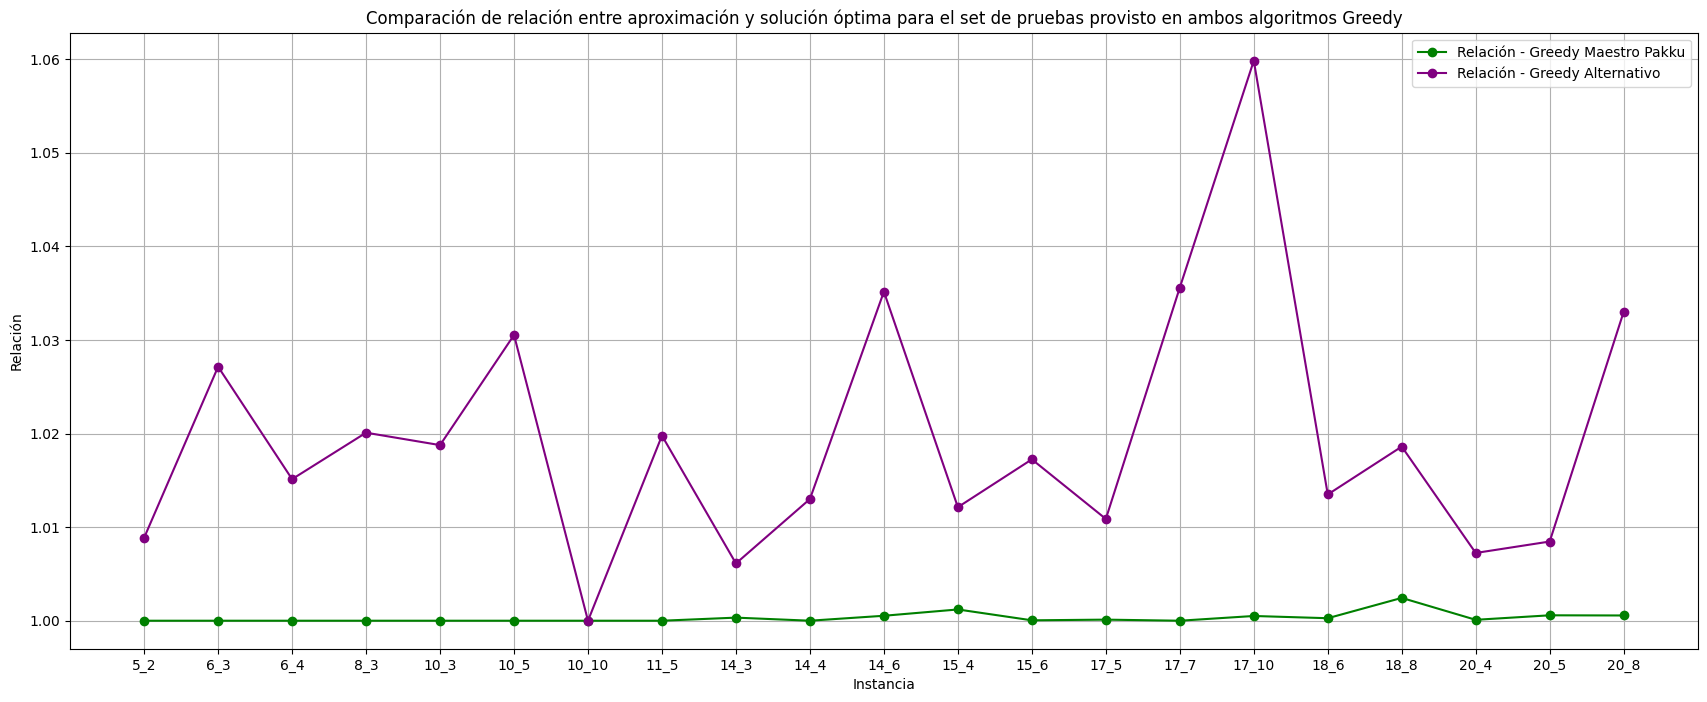

In [43]:
graficar_comparacion_greedys(CARPETA,archivos)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0003301593334895, 1.000001961803041, 1.0005294305208934, 1.0012027211275616, 1.0000432790124232, 1.0001159377103992, 1.0, 1.0005062858296714, 1.0002679499849945, 1.002437704748362, 1.0000977142687735, 1.0005787697624768, 1.0005603713901239]


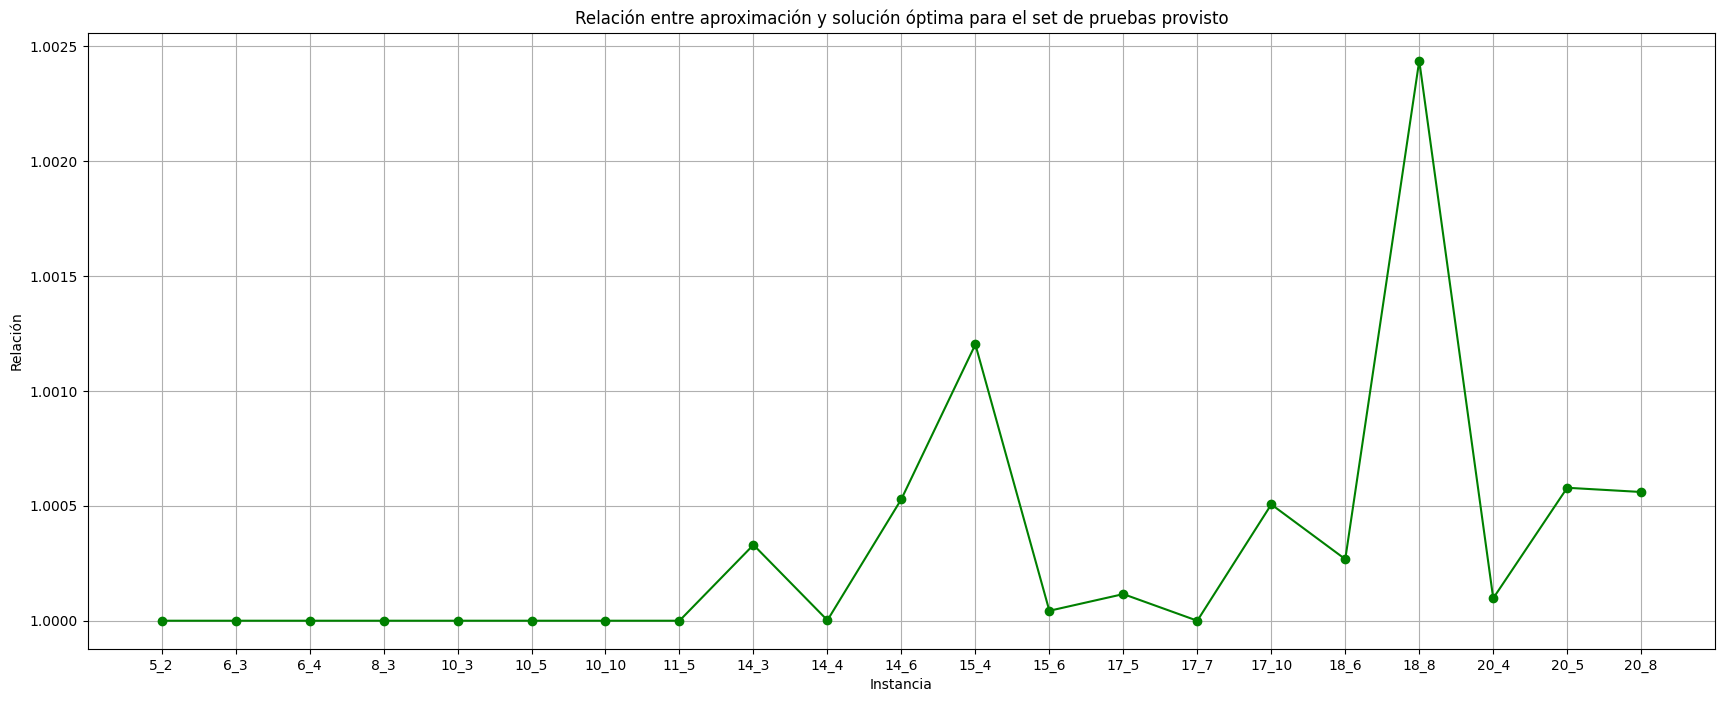

In [44]:
graficar_relacion_greedy_provisto(CARPETA,archivos)

# Graficos Relacion Set Aleatorio

In [45]:
def graficar_relacion_aleatoria(f1,f2,color,num_instancias, num_maestros, num_habilidades, k):
    aproximaciones = []
    optimos = []
    relaciones = []
    instancias = [i for i in range(2, num_instancias + 1)]

    for instancia in range(2, num_instancias + 1):
        maestros, habilidades, k_actual = generar_instancia_aleatoria(num_maestros, num_habilidades, k)
        _, coef_aprox = f1(maestros, habilidades, k_actual)
        _, coef_opt = f2(maestros, habilidades, k_actual)

        aproximaciones.append(coef_aprox)
        optimos.append(coef_opt)
        relaciones.append(coef_aprox / coef_opt)

    plt.figure(figsize=(10, 6.18))

    plt.subplot(1, 2, 2)
    plt.grid(True)
    plt.plot(instancias, relaciones, label='Relación Aproximación/Óptimo', marker='o', color=color)
    plt.xlabel('Instancia')
    plt.ylabel('Relación (R(A))')
    plt.title(f'Relación entre Aproximación y Solución Óptima para un set de datos aleatorio con k = {k}')

    plt.tight_layout()
    plt.show()

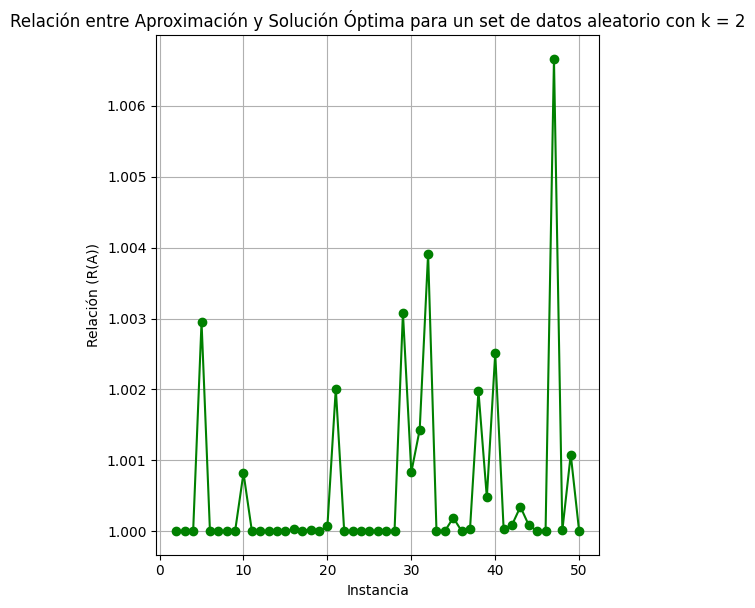

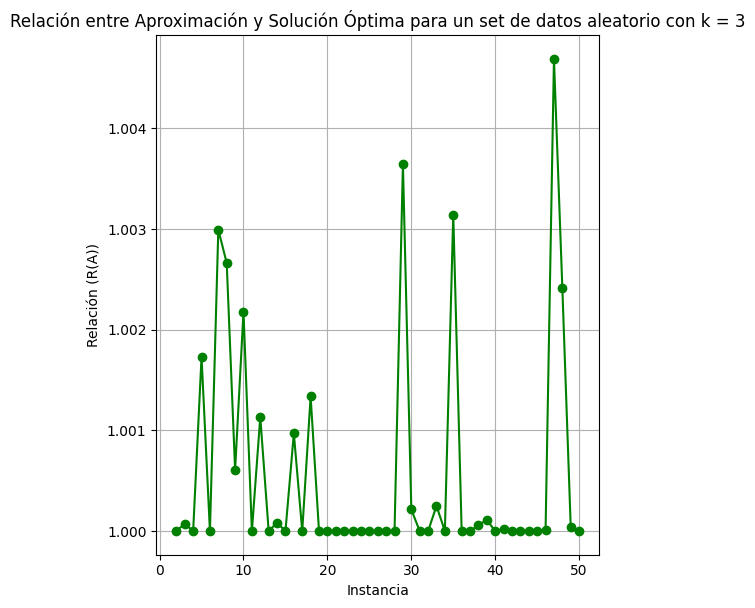

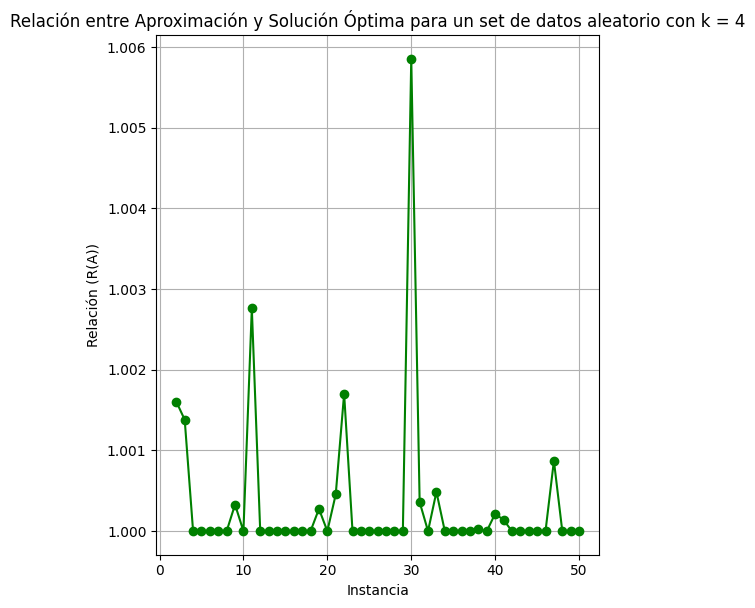

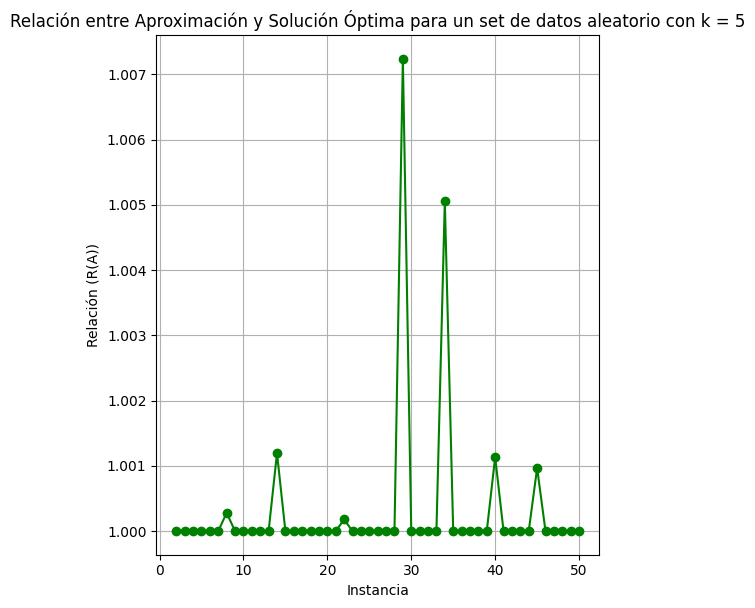

In [48]:
num_instancias = 50
num_habilidades = 1000
k = 3
color = 'green'
num_maestros = 12



graficar_relacion_aleatoria(p_opt_tribu_agua_gd,p_opt_tribu_agua_bt,color,num_instancias, num_maestros, num_habilidades, k)
graficar_relacion_aleatoria(p_opt_tribu_agua_gd,p_opt_tribu_agua_bt,color,num_instancias, num_maestros, num_habilidades, k+1)
graficar_relacion_aleatoria(p_opt_tribu_agua_gd,p_opt_tribu_agua_bt,color,num_instancias, num_maestros, num_habilidades, k+2)
graficar_relacion_aleatoria(p_opt_tribu_agua_gd,p_opt_tribu_agua_bt,color,num_instancias, num_maestros, num_habilidades, k+3)


[937, 613, 504, 407, 0]
[1434, 1260, 1322, 1133, 865]
[802, 656, 0, 0, 0]
[762, 750, 427, 177, 0]
[1401, 1258, 1110, 847, 708]
[1471, 1170, 1027, 952, 841]
[938, 681, 804, 684, 286]
[669, 478, 367, 343, 0]
[945, 1331, 1002, 641, 601]
[978, 1233, 1177, 766, 549]
[837, 807, 936, 507, 370]
[1576, 1158, 968, 741, 648]
[700, 667, 517, 440, 261]
[990, 828, 891, 810, 464]
[584, 464, 284, 15, 0]
[957, 873, 724, 616, 497]
[1472, 1254, 917, 848, 781]
[814, 946, 819, 395, 362]
[892, 1258, 925, 743, 477]
[661, 626, 578, 537, 183]
[981, 1091, 949, 677, 581]
[899, 330, 330, 292, 181]
[717, 847, 832, 652, 505]
[939, 330, 192, 0, 0]
[943, 912, 746, 459, 126]
[778, 519, 195, 124, 0]
[1447, 1386, 951, 652, 584]
[1530, 1474, 1387, 1303, 909]
[968, 1205, 996, 786, 700]
[888, 931, 876, 823, 628]
[866, 396, 0, 0, 0]
[993, 988, 885, 0, 0]
[978, 920, 820, 139, 76]
[964, 844, 765, 369, 339]
[835, 436, 330, 175, 134]
[896, 839, 980, 631, 375]
[1314, 1188, 1147, 1080, 1012]
[939, 489, 540, 250, 199]
[844, 804, 9

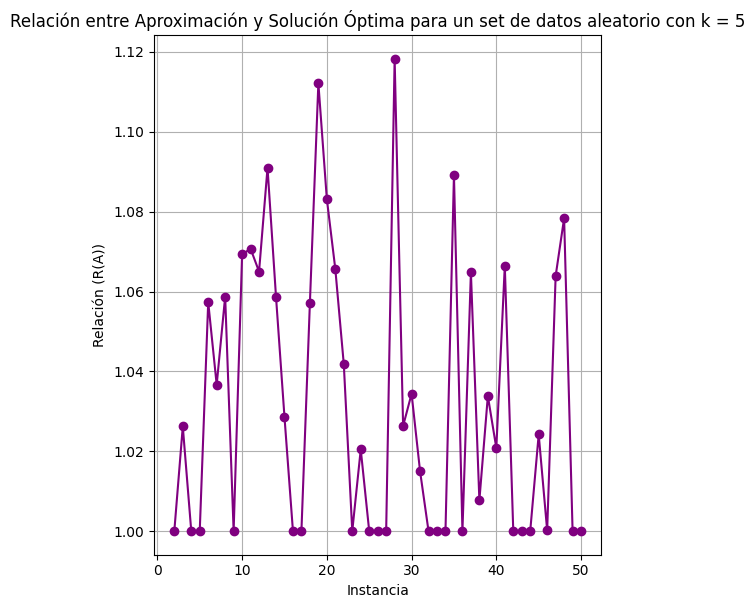

[982, 980, 848, 1005, 732, 415]
[899, 838, 48, 0, 0, 0]
[946, 597, 484, 447, 198, 144]
[909, 499, 456, 0, 0, 0]
[985, 976, 1053, 784, 699, 644]
[1286, 1206, 1124, 1104, 745, 530]
[425, 260, 96, 0, 0, 0]
[812, 600, 451, 241, 222, 179]
[1532, 1470, 1252, 1026, 835, 610]
[677, 468, 367, 349, 208, 123]
[994, 987, 937, 434, 339, 138]
[536, 530, 392, 353, 35, 0]
[1309, 1177, 1025, 965, 841, 620]
[997, 951, 525, 369, 332, 0]
[884, 787, 0, 0, 0, 0]
[711, 575, 420, 260, 205, 107]
[663, 552, 0, 0, 0, 0]
[728, 693, 342, 273, 0, 0]
[815, 805, 738, 948, 621, 398]
[994, 840, 769, 659, 340, 0]
[932, 864, 1048, 818, 588, 521]
[918, 855, 593, 191, 164, 63]
[1357, 1245, 1007, 774, 549, 531]
[1377, 1138, 1003, 916, 766, 601]
[1000, 837, 819, 710, 527, 405]
[877, 663, 86, 0, 0, 0]
[942, 1206, 867, 693, 561, 484]
[745, 175, 0, 0, 0, 0]
[740, 974, 777, 437, 377, 369]
[893, 814, 609, 507, 468, 278]
[960, 856, 449, 284, 216, 100]
[945, 1274, 964, 887, 752, 658]
[979, 699, 711, 427, 333, 230]
[1424, 1369, 1146

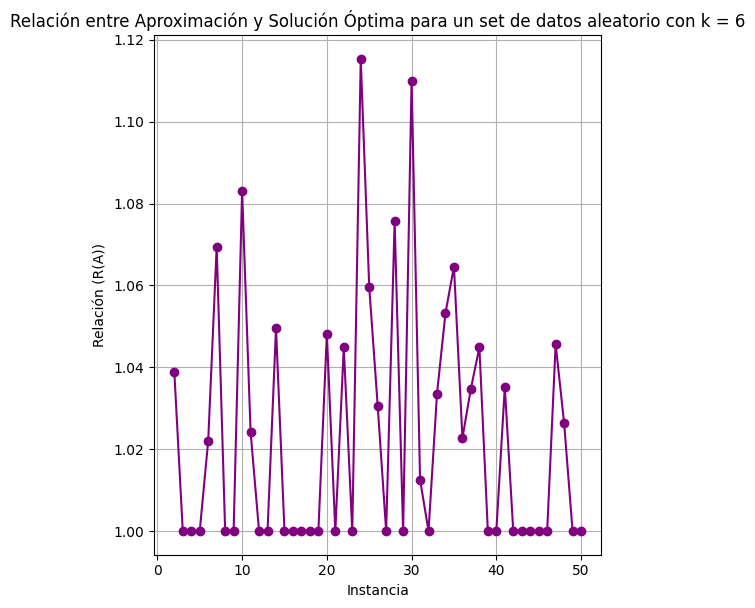

[549, 208, 0, 0, 0, 0, 0]
[915, 847, 806, 1211, 650, 640, 491]
[989, 885, 776, 1034, 627, 478, 426]
[1568, 1413, 1304, 999, 790, 670, 669]
[1368, 1350, 1263, 1218, 921, 509, 423]
[959, 813, 1083, 785, 771, 671, 356]
[756, 7, 0, 0, 0, 0, 0]
[686, 469, 331, 269, 210, 39, 0]
[794, 658, 627, 672, 436, 255, 187]
[924, 460, 256, 230, 0, 0, 0]
[878, 851, 962, 795, 504, 436, 385]
[982, 940, 915, 1249, 1045, 670, 521]
[696, 385, 329, 0, 0, 0, 0]
[884, 831, 783, 773, 732, 516, 435]
[906, 1221, 1148, 885, 743, 620, 597]
[982, 608, 590, 259, 189, 187, 0]
[940, 688, 682, 461, 285, 263, 34]
[992, 957, 932, 1192, 915, 865, 571]
[967, 714, 769, 730, 556, 314, 218]
[997, 791, 706, 858, 793, 403, 330]
[956, 751, 546, 606, 363, 272, 123]
[980, 957, 886, 880, 620, 218, 157]
[971, 864, 1115, 1035, 622, 456, 430]
[572, 453, 602, 462, 375, 319, 195]
[714, 652, 619, 686, 519, 468, 196]
[873, 721, 620, 831, 561, 392, 283]
[1504, 1365, 1153, 1058, 774, 673, 635]
[850, 764, 741, 710, 856, 477, 310]
[982, 574, 49

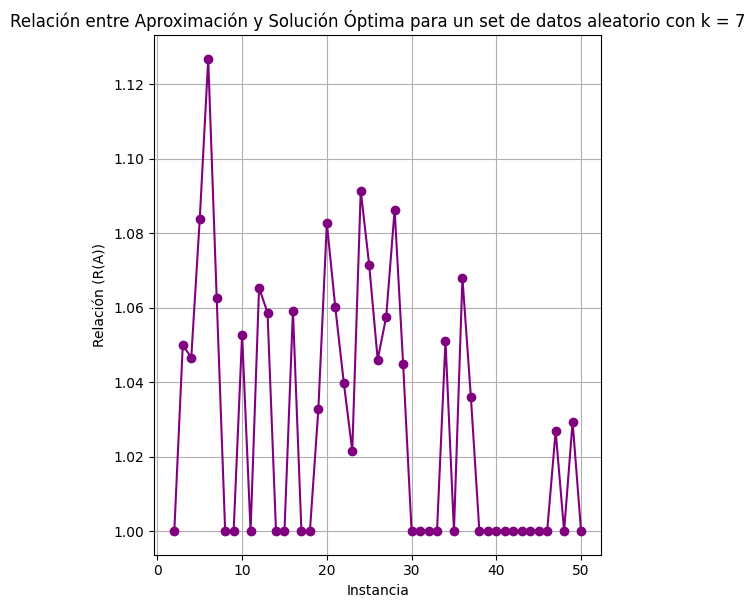

[802, 779, 720, 933, 819, 671, 428, 376]
[436, 308, 0, 0, 0, 0, 0, 0]
[857, 814, 770, 459, 375, 15, 0, 0]
[649, 484, 417, 400, 350, 195, 144, 138]
[816, 812, 546, 525, 421, 186, 156, 0]
[986, 766, 751, 693, 704, 594, 553, 304]
[919, 904, 878, 871, 681, 561, 483, 318]
[985, 804, 692, 650, 491, 480, 224, 171]
[833, 803, 656, 643, 203, 0, 0, 0]
[454, 380, 69, 0, 0, 0, 0, 0]
[573, 537, 178, 0, 0, 0, 0, 0]
[824, 711, 643, 748, 680, 534, 309, 274]
[878, 764, 1076, 940, 755, 561, 553, 483]
[1000, 917, 782, 603, 330, 228, 177, 173]
[747, 709, 0, 0, 0, 0, 0, 0]
[989, 972, 968, 857, 768, 699, 681, 450]
[782, 683, 809, 462, 412, 402, 374, 316]
[655, 611, 549, 499, 476, 393, 354, 112]
[975, 644, 639, 603, 0, 0, 0, 0]
[910, 543, 453, 361, 178, 0, 0, 0]
[858, 821, 109, 98, 0, 0, 0, 0]
[322, 309, 269, 0, 0, 0, 0, 0]
[646, 42, 0, 0, 0, 0, 0, 0]
[993, 480, 116, 45, 30, 0, 0, 0]
[742, 691, 605, 468, 462, 0, 0, 0]
[932, 1397, 1144, 978, 805, 768, 704, 681]
[957, 770, 0, 0, 0, 0, 0, 0]
[954, 712, 616, 696

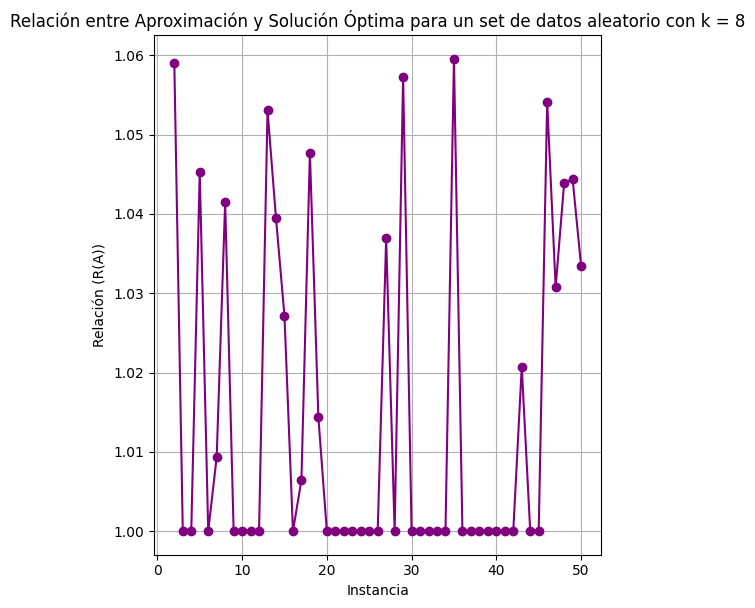

In [47]:
num_instancias = 50
num_maestros = 12
num_habilidades = 1000
k = 5
color = 'purple'

graficar_relacion_aleatoria(p_opt_tribu_agua_gd2,p_opt_tribu_agua_bt,color,num_instancias, num_maestros, num_habilidades, k)
graficar_relacion_aleatoria(p_opt_tribu_agua_gd2,p_opt_tribu_agua_bt,color,num_instancias, num_maestros, num_habilidades, k+1)
graficar_relacion_aleatoria(p_opt_tribu_agua_gd2,p_opt_tribu_agua_bt,color,num_instancias, num_maestros, num_habilidades, k+2)
graficar_relacion_aleatoria(p_opt_tribu_agua_gd2,p_opt_tribu_agua_bt,color,num_instancias, num_maestros, num_habilidades, k+3)


# Graficos solos BT Y PL

[Text(0, 0, '5_2'),
 Text(1, 0, '6_4'),
 Text(2, 0, '10_3'),
 Text(3, 0, '10_10'),
 Text(4, 0, '14_3'),
 Text(5, 0, '14_6'),
 Text(6, 0, '17_5'),
 Text(7, 0, '17_7'),
 Text(8, 0, '18_6'),
 Text(9, 0, '20_4')]

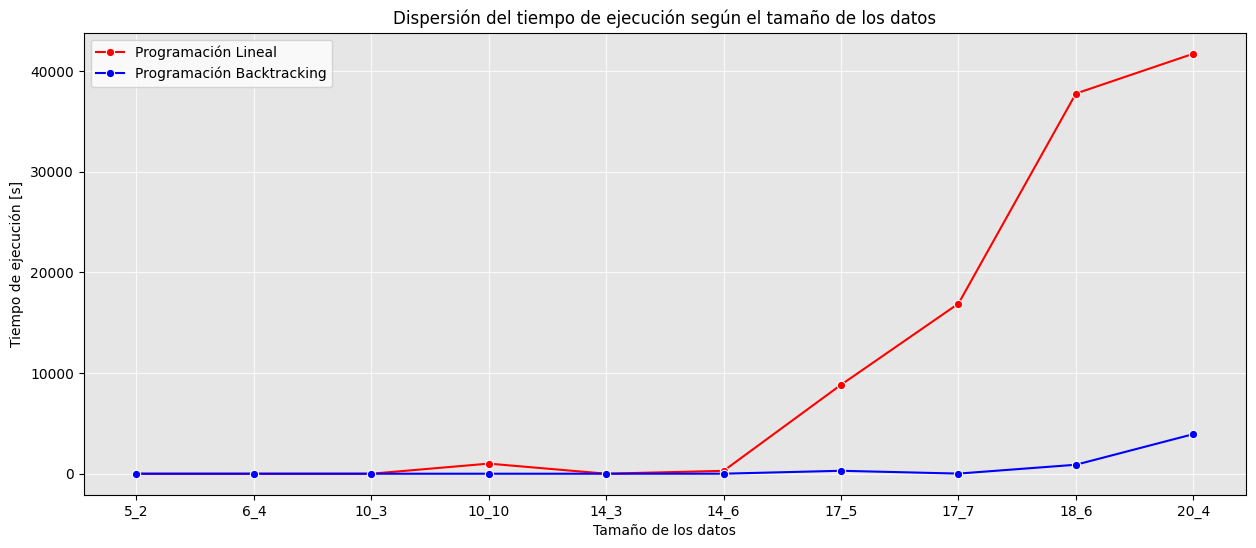

In [ ]:
pl_tiempos = [0.041, 0.11, 0.31, 1003.27, 2.29, 288.16, 8836.34, 16902.91, 37774.26, 41731.87]
bt_tiempos = [0.00015, 0.00012, 0.0098, 0.00038, 0.79, 4.26, 292.24, 13.61, 892.68, 3931.63]

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(pl_tiempos, label='Programación Lineal', color='red', ax=ax, marker='o')
sns.lineplot(bt_tiempos, label='Programación Backtracking', color='blue', ax=ax, marker='o')

ax.set_xlabel('Tamaño de los datos')
ax.set_ylabel('Tiempo de ejecución [s]')
ax.set_title('Dispersión del tiempo de ejecución según el tamaño de los datos')
ax.set_facecolor('#E7E6E6')
ax.grid(color='white', alpha=0.8)

ax.set_xticks(range(len(pl_tiempos)))  # Asegura que haya un tick para cada punto de datos

ax.set_xticklabels(['5_2', '6_4', '10_3', '10_10', '14_3', '14_6', '17_5', '17_7', '18_6', '20_4'])